## Meet Dr. Ignaz Semmelweis

This is Dr. Ignaz Semmelweis, a Hungarian physician born in 1818 and active at the Vienna General Hospital. If Dr. Semmelweis looks troubled it's probably because he's thinking about childbed fever: A deadly disease affecting women that just have given birth. He is thinking about it because in the early 1840s at the Vienna General Hospital as many as 10% of the women giving birth die from it. He is thinking about it because he knows the cause of childbed fever: It's the contaminated hands of the doctors delivering the babies. And they won't listen to him and wash their hands.

In this notebook, we're going to reanalyze the data that made Semmelweis discover the importance of handwashing. Let's start by looking at the data that made Semmelweis realize that something was wrong with the procedures at Vienna General Hospital.

In [11]:
import pandas as pd

yearly_deaths = pd.read_csv("Datasets/yearly_deaths_by_clinic.csv")

deaths

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.08
1,1842,3287,518,clinic 1,0.16
2,1843,3060,274,clinic 1,0.09
3,1844,3157,260,clinic 1,0.08
4,1845,3492,241,clinic 1,0.07
5,1846,4010,459,clinic 1,0.11
6,1841,2442,86,clinic 2,0.04
7,1842,2659,202,clinic 2,0.08
8,1843,2739,164,clinic 2,0.06
9,1844,2956,68,clinic 2,0.02


We see this more clearly if we look at the proportion of deaths out of the number of women giving birth. Let's zoom in on the proportion of deaths at Clinic 1.

In [12]:
yearly_deaths["proportion_deaths"] = round(yearly_deaths["deaths"] / yearly_deaths["births"], 2)

clinic_1 = yearly_deaths[yearly_deaths["clinic"] == "clinic 1"]
clinic_2 = yearly_deaths[yearly_deaths["clinic"] == "clinic 2"]

clinic_1

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.08
1,1842,3287,518,clinic 1,0.16
2,1843,3060,274,clinic 1,0.09
3,1844,3157,260,clinic 1,0.08
4,1845,3492,241,clinic 1,0.07
5,1846,4010,459,clinic 1,0.11


<Axes: xlabel='year', ylabel='Proportion deaths'>

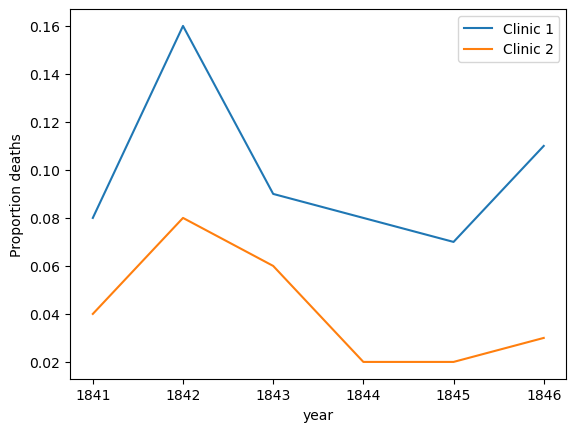

In [13]:
import matplotlib.pyplot as plt

ax = clinic_1.plot(x = "year", y = "proportion_deaths", label = "Clinic 1")
clinic_2.plot(x = "year", y = "proportion_deaths", label = "Clinic 2", ax=ax, ylabel="Proportion deaths")

## The handwashing begins

Why is the proportion of deaths consistently so much higher in Clinic 1? Semmelweis saw the same pattern and was puzzled and distressed. The only difference between the clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2. While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses.

Semmelweis started to suspect that something on the corpses spread from the hands of the medical students, caused childbed fever. So in a desperate attempt to stop the high mortality rates, he decreed: Wash your hands! This was an unorthodox and controversial request, nobody in Vienna knew about bacteria at this point in time.

In [21]:
monthly_deaths = pd.read_csv("Datasets/monthly_deaths.csv")

monthly_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [28]:
monthly_deaths["date"] = pd.to_datetime(monthly_deaths["date"])

In [31]:
monthly_deaths["proportion_deaths"] = round(monthly_deaths['deaths'] / monthly_deaths['births'],2)
monthly_deaths.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.15
1,1841-02-01,239,18,0.08
2,1841-03-01,277,12,0.04
3,1841-04-01,255,4,0.02
4,1841-05-01,255,2,0.01


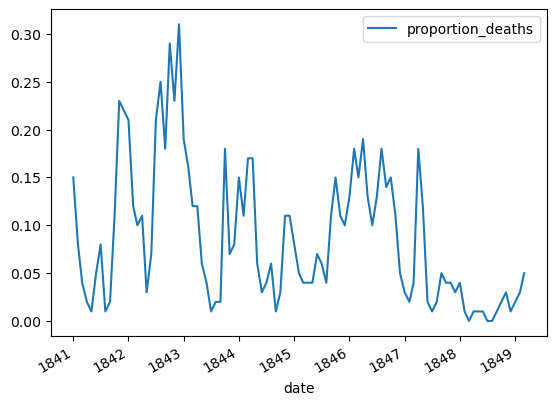

In [49]:
ax = monthly_deaths.plot(x="date", y="proportion_deaths")

<Axes: xlabel='date', ylabel='Proportion deaths'>

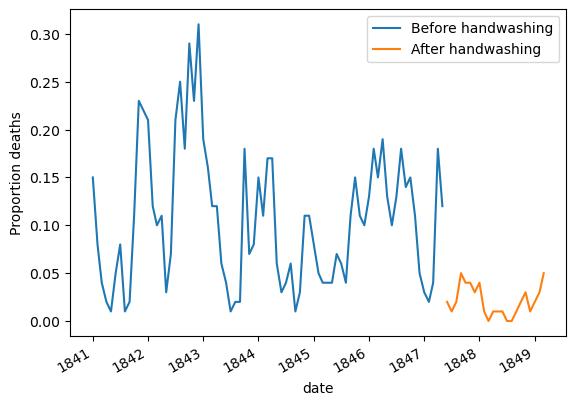

In [51]:
handwashing_start = pd.to_datetime("1847-06-01")

before_washing = monthly_deaths[monthly_deaths["date"] < handwashing_start]
after_washing = monthly_deaths[monthly_deaths["date"] >= handwashing_start]

ax = before_washing.plot(x="date", y="proportion_deaths", label="Before handwashing")
after_washing.plot(x="date", y="proportion_deaths", label="After handwashing", ax=ax, ylabel="Proportion deaths")

In [52]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.08369617224880382

In [53]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []

for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval


0.025   -0.101610
0.975   -0.067177
dtype: float64

## The fate of Dr. Semmelweis

So handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval. All in all, it would seem that Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.

The tragedy is that, despite the evidence, Semmelweis' theory — that childbed fever was caused by some "substance" (what we today know as bacteria) from autopsy room corpses — was ridiculed by contemporary scientists. The medical community largely rejected his discovery and in 1849 he was forced to leave the Vienna General Hospital for good.

One reason for this was that statistics and statistical arguments were uncommon in medical science in the 1800s. Semmelweis only published his data as long tables of raw data, but he didn't show any graphs nor confidence intervals. If he would have had access to the analysis we've just put together he might have been more successful in getting the Viennese doctors to wash their hands.